In [1]:
from utils import *

In [2]:
import pandas as pd

In [34]:
def read_log(logfile):

    data = []
    segment = []
    event = 'False'

    with open(logfile) as f:
        for i, line in enumerate(f):
            line = eval(line.replace('null', 'False'))

            if line['logtype'] == 'event':
                if line['event'] == ['Start Condition 1']:
                    event = 'c1'
                if line['event'] == ['Start Condition 2']:
                    event = 'c2'
                if line['event'] == ['Familiarization']:
                    event = 'c0'
                
                print(i, line)

            if line['logtype'] == 'segment':
                line['condition'] = event
                segment.append(line)
            if line['logtype'] == 'data':
                line['condition'] = event
                data.append(line)

    return data, segment

In [21]:
res, segment = read_log('../user_data/P1/2022-07-28T15-09-33.830Z.txt')

0 {'logtype': 'event', 'timestamp0': 228139, 'event': ['Familiarization']}


In [5]:
pd.DataFrame(res).to_csv('step0.csv')

In [35]:
res, segment = read_log('../user_data/P1/2022-07-28T15-10-29.580Z.txt')

0 {'logtype': 'event', 'timestamp0': 283892, 'event': ['Start Condition 1']}
25635 {'logtype': 'event', 'timestamp0': 643893, 'event': ['timer zero']}
25637 {'logtype': 'event', 'timestamp0': 686345, 'event': ['Start Condition 2']}
54854 {'logtype': 'event', 'timestamp0': 1046371, 'event': ['timer zero']}


In [25]:
res_df = pd.DataFrame(res)

In [12]:
select(res_df, condition='c1').to_csv('c1.csv')

In [13]:
select(res_df, condition='c2').to_csv('c2.csv')

In [36]:
segment = pd.DataFrame(segment)

In [37]:
segment.head()

,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,worker_1,avg_dtw,dtw,logtype,random_novelty,condition
0,2389.314165,31,0,2070.426888,0,0.000000,0.000000,2070.548560,0.000000,False,segment,0.839,c1
1,2580.995908,20,1,2261.270235,1,30.468331,1.194837,2262.147681,0.597418,2,segment,0.343,c1
2,2759.955577,17,2,2440.205404,2,8.206772,0.443609,2440.863569,0.546149,0.81225,segment,0.529,c1
3,3033.429436,27,3,2713.710510,3,10.186304,0.433460,2716.332614,0.517976,0.836833,segment,0.281,c1
4,3221.122196,20,4,2901.463014,2,4.704878,0.254318,2903.000634,0.465245,0.546632,segment,0.715,c1


<AxesSubplot:>

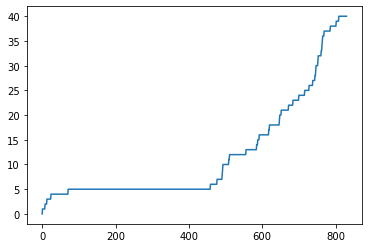

In [38]:
data = select(segment, condition='c1')
(data['min_dtw_pond'] > 1).cumsum().plot()

<AxesSubplot:>

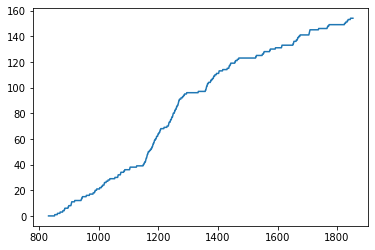

In [39]:
data = select(segment, condition='c2')
(data['min_dtw_pond'] > 1).cumsum().plot()